In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import os
import sys
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl,np, sklearn,pd,tf,keras:
    print(module.__name__,module.__version__)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.16.4
sklearn 0.21.2
pandas 0.24.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 1    #,test_size = 0.25   default, 3:1
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 2)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [7]:
# 子类api

class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel, self).__init__()
        #定义模型层次
        self.hidden1_layer = keras.layers.Dense(30, activation='relu')
        self.hidden2_layer = keras.layers.Dense(30, activation='relu')
        self.output_layer = keras.layers.Dense(1)
        
    def call(self, input):
        #完成模型的正向计算
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output

# 使用模型：先创建model 对象
model = WideDeepModel()
# 调用build函数来指定输入的shape是什么
model.build(input_shape=(None, 8))



model.summary()
model.compile(loss='mean_squared_error', optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]


Model: "wide_deep_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  270       
_________________________________________________________________
dense_7 (Dense)              multiple                  930       
_________________________________________________________________
dense_8 (Dense)              multiple                  39        
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train_scaled, y_train,
                   validation_data = (x_valid_scaled, y_valid),
                   epochs = 100,
                   callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 194us/sample - loss: 1.7976 - val_loss: 0.8222
Epoch 2/100
11610/11610 [==============================] - 2s 145us/sample - loss: 0.7977 - val_loss: 0.7510
Epoch 3/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.7261 - val_loss: 0.7013
Epoch 4/100
11610/11610 [==============================] - 2s 146us/sample - loss: 0.6808 - val_loss: 0.6631
Epoch 5/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.6434 - val_loss: 0.6294
Epoch 6/100
11610/11610 [==============================] - 2s 144us/sample - loss: 0.6130 - val_loss: 0.6027
Epoch 7/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.5884 - val_loss: 0.5789
Epoch 8/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.5672 - val_loss: 0.5601
Epoch 9/100
11610/11610 [==============================] - 2s 157us/sample - lo

11610/11610 [==============================] - 2s 144us/sample - loss: 0.3911 - val_loss: 0.3932
Epoch 76/100
11610/11610 [==============================] - 2s 144us/sample - loss: 0.3900 - val_loss: 0.3918
Epoch 77/100
11610/11610 [==============================] - 2s 157us/sample - loss: 0.3883 - val_loss: 0.3905
Epoch 78/100
11610/11610 [==============================] - 2s 145us/sample - loss: 0.3874 - val_loss: 0.3915
Epoch 79/100
11610/11610 [==============================] - 2s 145us/sample - loss: 0.3877 - val_loss: 0.3900
Epoch 80/100
11610/11610 [==============================] - 2s 150us/sample - loss: 0.3856 - val_loss: 0.3895
Epoch 81/100
11610/11610 [==============================] - 2s 149us/sample - loss: 0.3854 - val_loss: 0.3884
Epoch 82/100
11610/11610 [==============================] - 2s 147us/sample - loss: 0.3849 - val_loss: 0.3872
Epoch 83/100
11610/11610 [==============================] - 2s 148us/sample - loss: 0.3839 - val_loss: 0.3860
Epoch 84/100
11610/1161

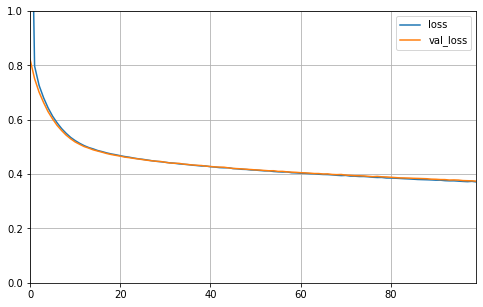

In [9]:
def plot_learnig_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learnig_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 85us/sample - loss: 0.3982


0.3981797516114952